# Assignment1
#### Deep Learning, prof. Choi

## Import Libraries

In [2]:
import numpy as numpy
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
import optuna

## Prepare datasets

![](dataset.png)

In [3]:
x_train = torch.FloatTensor([[3.8, 700, 80, 50],
                             [3.2, 650, 90, 30],
                             [3.7, 820, 70, 40],
                             [4.2, 830, 50, 70],
                             [2.6, 550, 90, 60],
                             [3.4, 910, 30, 40],
                             [4.1, 990, 70, 20],
                             [3.3, 870, 60, 60],
                             [3.9, 650, 80, 50]
                            ])
y_train = torch.FloatTensor([[85], [80], [78], [87], [85], [70], [81], [88], [84]])

## Parameter optimization using optuna

In [4]:
def objective(trial):
    num_epochs = trial.suggest_int('epoch_num', 1000, 10000, step=1000)
    lr = trial.suggest_categorical('lr', [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001])

    # define parameters
    W = torch.zeros([4, 1], requires_grad=True)
    b = torch.zeros(1, requires_grad=True)

    # set optimizer
    optimizer = optim.SGD([W, b], lr = lr)

    costs = []
    for epoch in range(num_epochs):
        hypothesis = x_train.matmul(W) + b
        cost = torch.mean((hypothesis - y_train)**2)

        if torch.isnan(cost) or torch.isinf(cost):
            raise optuna.TrialPruned()

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        costs.append(cost.item())

        trial.report(cost.item(), epoch)
        if trial.should_prune():
            raise optuna.TrialPruned()

    print(f"Trial {trial.number} - Epoch: {num_epochs}, lr: {lr}, Cost: {cost:.4f}")

    return cost.item()

## Study optuna

In [5]:
optuna.logging.set_verbosity(optuna.logging.WARNING)

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

Trial 1 - Epoch: 6000, lr: 1e-06, Cost: 2.4542
Trial 4 - Epoch: 1000, lr: 1e-06, Cost: 14.3774
Trial 11 - Epoch: 1000, lr: 1e-06, Cost: 14.3774
Trial 12 - Epoch: 5000, lr: 1e-06, Cost: 2.4938
Trial 13 - Epoch: 5000, lr: 1e-06, Cost: 2.4938
Trial 14 - Epoch: 6000, lr: 1e-06, Cost: 2.4542
Trial 15 - Epoch: 8000, lr: 1e-06, Cost: 2.4359
Trial 17 - Epoch: 8000, lr: 1e-06, Cost: 2.4359
Trial 18 - Epoch: 8000, lr: 1e-06, Cost: 2.4359
Trial 19 - Epoch: 10000, lr: 1e-06, Cost: 2.4336
Trial 21 - Epoch: 9000, lr: 1e-06, Cost: 2.4343
Trial 22 - Epoch: 9000, lr: 1e-06, Cost: 2.4343
Trial 23 - Epoch: 10000, lr: 1e-06, Cost: 2.4336
Trial 24 - Epoch: 10000, lr: 1e-06, Cost: 2.4336


## Best parameter

In [6]:
best_params = study.best_params
print("Best parameters:", best_params)

best_epoch = best_params['epoch_num']
best_lr = best_params['lr']

Best parameters: {'epoch_num': 10000, 'lr': 1e-06}


## Initialize model

In [7]:
W = torch.zeros([4, 1], requires_grad=True)
b = torch.zeros(1, requires_grad=True)

## Train model

In [8]:
optimizer = optim.SGD([W, b], lr=best_lr)

costs = []
for epoch in range(best_epoch):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    costs.append(cost.item())

    if epoch % (best_epoch // 10) == 0:  # 10번만 출력
        print(f"Epoch {epoch}/{best_epoch} - Cost: {cost.item()}")

Epoch 0/10000 - Cost: 6751.5556640625


Epoch 1000/10000 - Cost: 14.346466064453125
Epoch 2000/10000 - Cost: 4.187704563140869
Epoch 3000/10000 - Cost: 2.96061635017395
Epoch 4000/10000 - Cost: 2.610428810119629
Epoch 5000/10000 - Cost: 2.4937002658843994
Epoch 6000/10000 - Cost: 2.4541242122650146
Epoch 7000/10000 - Cost: 2.4406306743621826
Epoch 8000/10000 - Cost: 2.435948610305786
Epoch 9000/10000 - Cost: 2.434258222579956


## Plot Epoch with cost

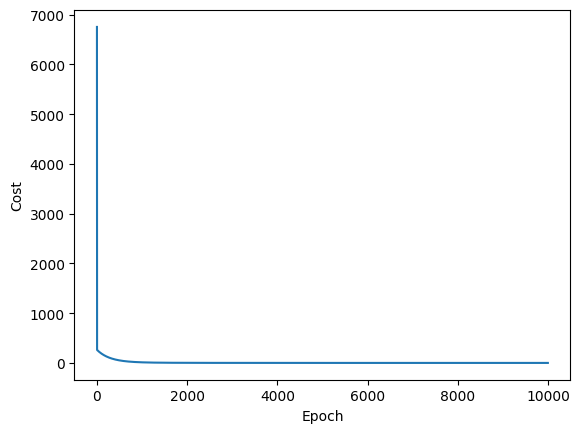

In [9]:
plt.plot(range(best_epoch), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.show()

## Test model

In [10]:
test_data = torch.FloatTensor([[3.3, 700, 77, 84]])
predict = test_data.matmul(W) + b
pred_val = predict.squeeze().detach().numpy()
print('Total score is estimated %d' %(pred_val))

Total score is estimated 97
